In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('database.csv')
df.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
#EDA
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [3]:
# Total number of missing values per column
print(" Missing Values per Column:")
print(df.isnull().sum().sort_values(ascending=False))

 Missing Values per Column:
Magnitude Error               23085
Horizontal Error              22256
Horizontal Distance           21808
Magnitude Seismic Stations    20848
Depth Error                   18951
Depth Seismic Stations        16315
Azimuthal Gap                 16113
Root Mean Square               6060
Magnitude Type                    3
Date                              0
Longitude                         0
Latitude                          0
Time                              0
Type                              0
Magnitude                         0
Depth                             0
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64


In [4]:
print(" Percentage of Missing Data per Column:")
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

 Percentage of Missing Data per Column:
Magnitude Error               98.603280
Horizontal Error              95.062361
Horizontal Distance           93.148813
Magnitude Seismic Stations    89.048351
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Azimuthal Gap                 68.823680
Root Mean Square              25.884162
Magnitude Type                 0.012814
Date                           0.000000
Longitude                      0.000000
Latitude                       0.000000
Time                           0.000000
Type                           0.000000
Magnitude                      0.000000
Depth                          0.000000
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64


In [5]:
# Drop rows with more than 70% missing values
threshold = int(0.7 * df.shape[1])
df = df[df.isnull().sum(axis=1) <= threshold]
print("After dropping rows with >70% missing values:", df.shape)

After dropping rows with >70% missing values: (23412, 21)


In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [7]:
# Imputation with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-7-2b01704eb44e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
# Imputation with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-8-665c7dd1549b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
print("Missing values remaining:", df.isnull().sum().sum())

Missing values remaining: 0


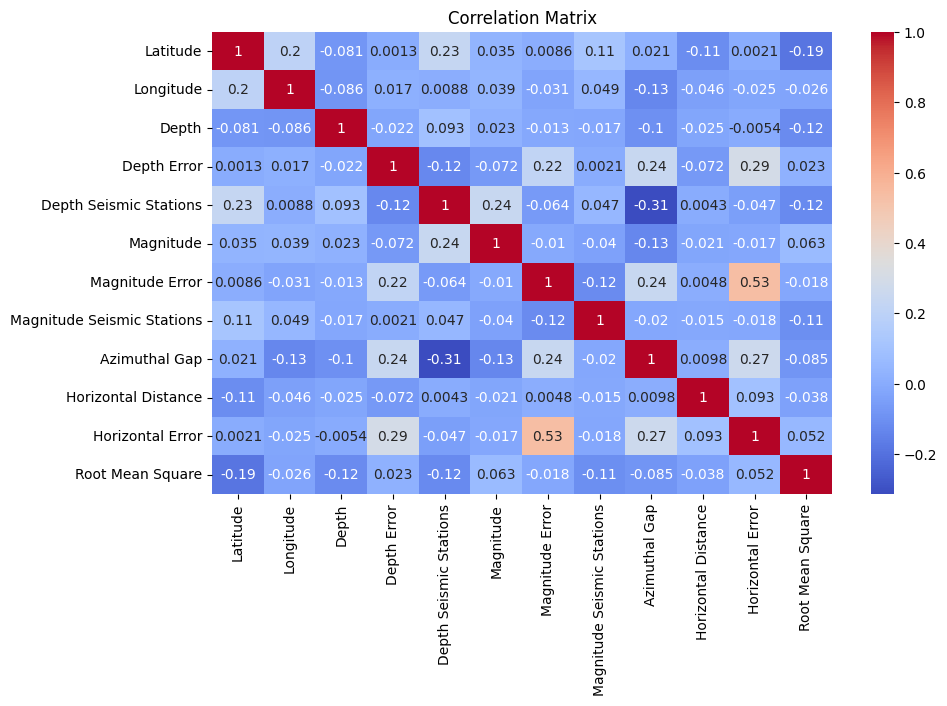

In [10]:
# Correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [11]:
X = df.drop(columns=['Magnitude'])
X = X.select_dtypes(include=[np.number])  # Keep only numeric features

y = df['Magnitude']

In [12]:
from sklearn.preprocessing import PowerTransformer

# Positivity check for Box-Cox
if (y <= 0).any():
    y += abs(y.min()) + 1

pt_y = PowerTransformer(method='box-cox')
y_trans = pt_y.fit_transform(y.values.reshape(-1, 1)).flatten()


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.8713900142647132
R2 Score: 0.13159340379183315
